1. Importing all Required Libraries

In [2]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

2. Data Visualization and Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None
   ID                             Title     Genre  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                         Description  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...

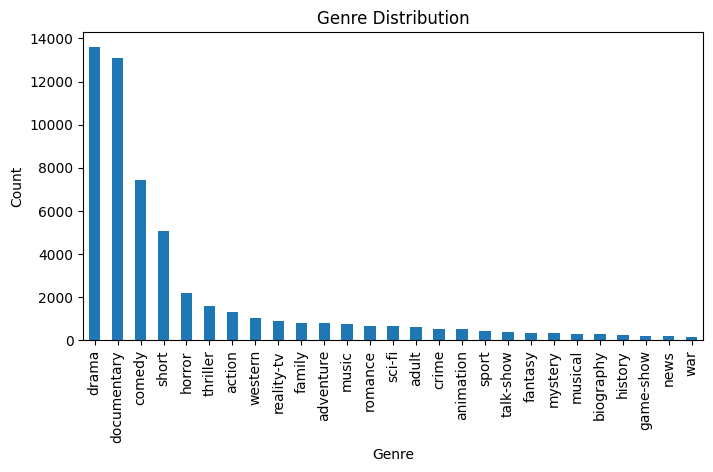

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data

df = pd.read_csv('./drive/MyDrive/Colab Notebooks/train_data.txt', sep=' ::: ', engine='python', names=['ID', 'Title', 'Genre', 'Description'])

# Display basic information
print(df.info())
print(df.head())

# Visualization: Genre distribution
genre_counts = df['Genre'].value_counts()
plt.figure(figsize=(8,4))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()



The dataset appears to have a large number of 'drama' movies, followed by 'comedy' and 'short' films, indicating an imbalanced dataset.

3. Data Preprocessing - Remove Stop words, Lemmatization, Stemming

In [5]:
#Data Preprocessing

#Remove stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stop_words(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Apply stop words removal to the 'description' column
df['Description'] = df['Description'].apply(remove_stop_words)

print(df.head())

   ID                             Title     Genre  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                         Description  
0  Listening conversation doctor parents , 10-yea...  
1  brother sister past incestuous relationship cu...  
2  bus empties students field trip Museum Natural...  
3  help unemployed father make ends meet , Edith ...  
4  film 's title refers un-recovered bodies groun...  


In [6]:
# Function to perform lemmatization
def perform_lemmatization(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply stemming and lemmatization to the 'Plot' column
df['Description'] = df['Description'].apply(perform_lemmatization)

print(df.head())

   ID                             Title     Genre  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                         Description  
0  Listening conversation doctor parent , 10-year...  
1  brother sister past incestuous relationship cu...  
2  bus empty student field trip Museum Natural Hi...  
3  help unemployed father make end meet , Edith t...  
4  film 's title refers un-recovered body ground ...  


4. Data Splitting and Feature Extraction

In [7]:
# Step 2: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(df['Description'], df['Genre'], test_size=0.3, random_state=42)

# Step 3: Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Model Traing and Evaluation

1. Random Forest

In [9]:
# Training using Random Forest
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_classifier.fit(X_train_tfidf, y_train)

y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred_rf)}")

Random Forest Accuracy: 0.4925914540424224


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classification Report:
              precision    recall  f1-score   support

      action       0.00      0.00      0.00       398
       adult       0.78      0.12      0.20       156
   adventure       0.58      0.10      0.16       220
   animation       0.00      0.00      0.00       146
   biography       0.00      0.00      0.00        88
      comedy       0.49      0.32      0.38      2215
       crime       1.00      0.02      0.04       164
 documentary       0.57      0.85      0.68      3942
       drama       0.42      0.83      0.56      4076
      family       0.83      0.02      0.04       218
     fantasy       0.00      0.00      0.00       103
   game-show       0.85      0.42      0.56        55
     history       0.00      0.00      0.00        73
      horror       0.59      0.18      0.28       626
       music       0.69      0.21      0.32       217
     musical       1.00      0.01      0.03        77
     mystery       0.00      0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. Multinomial naive bayes

In [10]:
# Training using Multinomial naive bayes
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train_tfidf, y_train)

mnb_pred = mnb_classifier.predict(X_test_tfidf)

# Evaluation
mnb_accuracy = accuracy_score(y_test, mnb_pred)
print(f"Random Forest Accuracy: {mnb_accuracy}")
print(f"Multinomial NaiveBayes Classification Report:\n{classification_report(y_test, mnb_pred)}")

Random Forest Accuracy: 0.5150322778973255


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Multinomial NaiveBayes Classification Report:
              precision    recall  f1-score   support

      action       0.65      0.06      0.11       398
       adult       0.67      0.06      0.12       156
   adventure       0.48      0.07      0.13       220
   animation       0.00      0.00      0.00       146
   biography       0.00      0.00      0.00        88
      comedy       0.51      0.43      0.47      2215
       crime       0.00      0.00      0.00       164
 documentary       0.56      0.88      0.69      3942
       drama       0.45      0.83      0.58      4076
      family       0.00      0.00      0.00       218
     fantasy       0.00      0.00      0.00       103
   game-show       1.00      0.09      0.17        55
     history       0.00      0.00      0.00        73
      horror       0.73      0.31      0.44       626
       music       0.88      0.07      0.13       217
     musical       0.00      0.00      0.00        77
     mystery       0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. Support vector machines

In [11]:
# Training using support vector machines
svm_classifier = SVC(kernel='sigmoid')
svm_classifier.fit(X_train_tfidf, y_train)

y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Evaluation
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Classification Report:\n{classification_report(y_test, y_pred_svm)}")

SVM Accuracy: 0.5825391945896096


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Classification Report:
              precision    recall  f1-score   support

      action       0.43      0.30      0.35       398
       adult       0.71      0.42      0.52       156
   adventure       0.47      0.23      0.31       220
   animation       0.58      0.15      0.24       146
   biography       0.00      0.00      0.00        88
      comedy       0.52      0.59      0.55      2215
       crime       0.27      0.04      0.06       164
 documentary       0.67      0.83      0.74      3942
       drama       0.54      0.76      0.63      4076
      family       0.44      0.12      0.19       218
     fantasy       0.46      0.06      0.10       103
   game-show       0.93      0.49      0.64        55
     history       0.00      0.00      0.00        73
      horror       0.65      0.58      0.62       626
       music       0.68      0.51      0.58       217
     musical       0.56      0.06      0.12        77
     mystery       0.00      0.00      0.00        90


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have X and y as your features and target variable
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Description'], df['Genre'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the text data into numerical vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = lr_model.predict(X_test_tfidf)

# Evaluation
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {lr_accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.582772295490178


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

      action       0.55      0.25      0.35       263
       adult       0.81      0.20      0.32       112
   adventure       0.46      0.12      0.19       139
   animation       0.80      0.04      0.07       104
   biography       0.00      0.00      0.00        61
      comedy       0.52      0.59      0.55      1443
       crime       0.40      0.02      0.04       107
 documentary       0.66      0.86      0.75      2659
       drama       0.53      0.80      0.64      2697
      family       0.50      0.07      0.12       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.93      0.35      0.51        40
     history       0.00      0.00      0.00        45
      horror       0.67      0.57      0.62       431
       music       0.69      0.42      0.52       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.00      0.00        56
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Comapre models Accuracies

In [17]:
# Creating a DataFrame for comparison
import pandas as pd

model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM','Multinomial naive bayes'],
    'Accuracy': [lr_accuracy, rf_accuracy, svm_accuracy, mnb_accuracy]
})

print(model_comparison)

                     Model  Accuracy
0      Logistic Regression  0.582772
1            Random Forest  0.492591
2                      SVM  0.582539
3  Multinomial naive bayes  0.515032


In this movie genre prediction analysis, Logistic Regression leads with the highest accuracy of 58.28% after applying preprocessing techniques like stemming, lemmatization, and removing stopwords. Support Vector Machine (SVM) closely follows at 58.25%. Random Forest lags behind with 49.26%, and Multinomial Naive Bayes achieves 51.50%. These results highlight the impact of preprocessing on model performance, with Logistic Regression and SVM emerging as the most effective models.